In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

* Load the Datasets.
* Check for Population Density Data in the dataset.

Explore Trends:
* Correlation between Population Density & Malaria Prevalence.
* Visualize regional malaria trends using scatter plots.

Statistical Analysis:
* Perform regression analysis to quantify the relationship.
* Use ANOVA or t-tests if comparing urban vs. rural areas.

Model Malaria Risk:
* Use Random Forest / XGBoost to predict malaria risk based on population density and other socioeconomic factors.

In [43]:
mal = pd.read_csv('Malaria screener.csv')

In [44]:
mal.columns.tolist()

['DHSID',
 'GPS_Dataset',
 'DHSCC',
 'DHSYEAR',
 'DHSCLUST',
 'SurveyID',
 'All_Population_Count_2000',
 'All_Population_Count_2005',
 'All_Population_Count_2010',
 'All_Population_Count_2015',
 'All_Population_Count_2020',
 'Aridity_2000',
 'Aridity_2005',
 'Aridity_2010',
 'Aridity_2015',
 'Aridity_2020',
 'Day_Land_Surface_Temp_2000',
 'Day_Land_Surface_Temp_2005',
 'Day_Land_Surface_Temp_2010',
 'Day_Land_Surface_Temp_2015',
 'Day_Land_Surface_Temp_2020',
 'Diurnal_Temperature_Range_2000',
 'Diurnal_Temperature_Range_2005',
 'Diurnal_Temperature_Range_2010',
 'Diurnal_Temperature_Range_2015',
 'Diurnal_Temperature_Range_2020',
 'Drought_Episodes',
 'Elevation',
 'Enhanced_Vegetation_Index_2000',
 'Enhanced_Vegetation_Index_2005',
 'Enhanced_Vegetation_Index_2010',
 'Enhanced_Vegetation_Index_2015',
 'Enhanced_Vegetation_Index_2020',
 'Frost_Days_2000',
 'Frost_Days_2005',
 'Frost_Days_2010',
 'Frost_Days_2015',
 'Frost_Days_2020',
 'Global_Human_Footprint',
 'Growing_Season_Length'

In [45]:
# Identify Population Density & Malaria Columns
density_col = [col for col in mal.columns if 'density' in col.lower()]
malaria_col = [col for col in mal.columns if 'malaria' in col.lower() or 'prevalence' in col.lower()]

if not density_col or not malaria_col:
    raise ValueError("⚠️ Population density or malaria prevalence column not found!")

In [32]:
density_col

['UN_Population_Density_2000',
 'UN_Population_Density_2005',
 'UN_Population_Density_2010',
 'UN_Population_Density_2015',
 'UN_Population_Density_2020']

In [34]:
x = mal[density_col].dropna()
x

,UN_Population_Density_2000,UN_Population_Density_2005,UN_Population_Density_2010,UN_Population_Density_2015,UN_Population_Density_2020
0,122.340126,137.952301,156.200867,176.804611,198.476639
1,328.920227,370.894653,419.957245,475.351868,533.618652
2,175.446625,197.835861,224.005936,253.553528,284.633148
3,155.192780,174.997360,198.146332,224.282898,251.774643
4,62.213058,70.152237,79.432098,89.909622,100.930397
...,...,...,...,...,...
562,56.863029,65.091377,74.818909,85.971573,97.972488
563,238.354767,272.845795,313.621033,360.370056,410.674683
564,157.185364,179.930801,206.820419,237.649536,270.823425
565,5623.528809,6437.278809,7399.293457,8502.248047,9689.090820


In [46]:
df_selected = mal[density_col + malaria_col].dropna()
df_selected

,UN_Population_Density_2000,UN_Population_Density_2005,UN_Population_Density_2010,UN_Population_Density_2015,UN_Population_Density_2020,Malaria_Incidence_2000,Malaria_Incidence_2005,Malaria_Incidence_2010,Malaria_Incidence_2015,Malaria_Incidence_2020,Malaria_Prevalence_2000,Malaria_Prevalence_2005,Malaria_Prevalence_2010,Malaria_Prevalence_2015,Malaria_Prevalence_2020
0,122.340126,137.952301,156.200867,176.804611,198.476639,0.473829,0.516745,0.453744,0.297229,0.309522,0.443742,0.502806,0.398573,0.229517,0.257955
1,328.920227,370.894653,419.957245,475.351868,533.618652,0.432225,0.465563,0.369821,0.238898,0.253107,0.387313,0.425336,0.301492,0.168331,0.195598
2,175.446625,197.835861,224.005936,253.553528,284.633148,0.355954,0.419926,0.434758,0.271250,0.275993,0.297440,0.364202,0.378665,0.204687,0.223645
3,155.192780,174.997360,198.146332,224.282898,251.774643,0.504899,0.592708,0.601645,0.457714,0.427885,0.490391,0.601789,0.646988,0.420883,0.424077
4,62.213058,70.152237,79.432098,89.909622,100.930397,0.524949,0.555036,0.470715,0.360563,0.341789,0.535894,0.585984,0.426802,0.300469,0.302240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,56.863029,65.091377,74.818909,85.971573,97.972488,0.521771,0.526259,0.518202,0.404931,0.475991,0.654685,0.659777,0.596546,0.406988,0.583962
563,238.354767,272.845795,313.621033,360.370056,410.674683,0.533525,0.530294,0.503771,0.314972,0.449664,0.647400,0.621077,0.556260,0.286272,0.535191
564,157.185364,179.930801,206.820419,237.649536,270.823425,0.475029,0.465032,0.426572,0.231593,0.383687,0.495604,0.482259,0.426508,0.180346,0.408389
565,5623.528809,6437.278809,7399.293457,8502.248047,9689.090820,0.458034,0.445880,0.400892,0.211780,0.359950,0.469643,0.451972,0.391404,0.157461,0.369854


In [47]:
x = df_selected

####  Visualize the relationship using scatter plots.

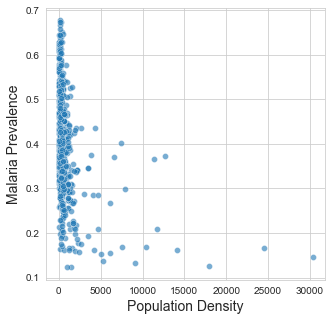

In [48]:
# Scatter Plot: Population Density vs Malaria Prevalence
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_selected, x=density_col[2], y=malaria_col[2], alpha=0.6)
#plt.title("Malaria Prevalence vs Population Density")
plt.xlabel("Population Density", fontsize=14)
plt.ylabel("Malaria Prevalence", fontsize=14)
plt.show()

    Malaria Prevalence vs Population Density

Check correlation between population density & malaria prevalence.

* select the pairs with strong corrections

In [49]:
# Correlation Analysis
correlation = df_selected.corr()
print("\n📊 Correlation between Population Density & Malaria:\n", correlation)


📊 Correlation between Population Density & Malaria:
                             UN_Population_Density_2000  \
UN_Population_Density_2000                    1.000000   
UN_Population_Density_2005                    0.999957   
UN_Population_Density_2010                    0.999792   
UN_Population_Density_2015                    0.999417   
UN_Population_Density_2020                    0.998669   
Malaria_Incidence_2000                       -0.420980   
Malaria_Incidence_2005                       -0.337775   
Malaria_Incidence_2010                       -0.330577   
Malaria_Incidence_2015                       -0.289134   
Malaria_Incidence_2020                       -0.100679   
Malaria_Prevalence_2000                      -0.244908   
Malaria_Prevalence_2005                      -0.194241   
Malaria_Prevalence_2010                      -0.282734   
Malaria_Prevalence_2015                      -0.258137   
Malaria_Prevalence_2020                      -0.056656   

                 

##### Predict malaria risk using linear regression & random forest.

In [50]:
# Regression Analysis
X = df_selected[[density_col[2]]]
y = df_selected[malaria_col[2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Train Regression Model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predictions & Evaluation
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🎯 Regression Model Performance:\nMAE: {mae:.3f}, R²: {r2:.3f}")


🎯 Regression Model Performance:
MAE: 0.101, R²: 0.065


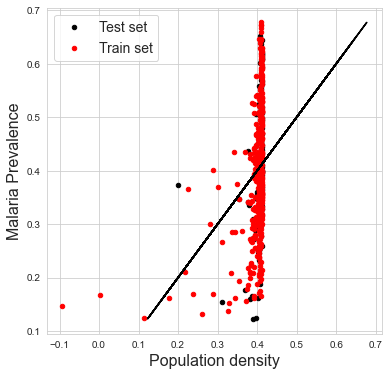

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(reg_model.predict(X_test), y_test, s=20, color='black', label = 'Test set')
ax.scatter(reg_model.predict(X_train), y_train, s=20, color='red', label = 'Train set')
ax.plot(y_test, y_test, color='black')
ax.plot(y_train, y_train, color='black')
plt.legend(fontsize=14)
ax.set_xlabel('Population density', fontsize=16)
ax.set_ylabel('Malaria Prevalence', fontsize=16);

##### Identify feature importance for malaria risk factors.

In [54]:
# Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

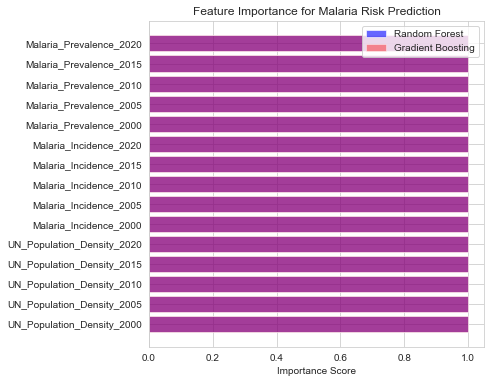

In [56]:

sns.set_style("whitegrid")
rf_model_feature_importance = rf_model.feature_importances_
gb_feature_importance = gb.feature_importances_

features = x.columns
plt.figure(figsize=(6, 6))
plt.barh(features, rf_model_feature_importance, color='blue', alpha=0.6, label='Random Forest')
plt.barh(features, gb_feature_importance, color='red', alpha=0.4, label='Gradient Boosting')
plt.title("Feature Importance for Malaria Risk Prediction")
plt.xlabel("Importance Score")
plt.legend()
plt.show()